1.データローダーでDatasetsを作成  
2.classの定義 インスタンス化  
3.loss関数、最適化手法を定義  
4.for 文  
- 勾配初期化　optimizer.zero_grad()
- predict　model()
- lossを計算　criterion()
- 勾配を計算　loss.backward()
- パラメータの更新　optimizer.step()

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.002

In [ ]:
x_train = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                    7.042, 10.791, 5.313, 7.997, 3.1], dtype=np.float32)

y_train = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                    2.827, 3.465, 1.65, 2.904, 1.3], dtype=np.float32)
print("ORG:", x_train)
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
print("RESHAPE:",x_train)

ORG: [ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  3.1  ]
RESHAPE: [[ 3.3  ]
 [ 4.4  ]
 [ 5.5  ]
 [ 6.71 ]
 [ 6.93 ]
 [ 4.168]
 [ 9.779]
 [ 6.182]
 [ 7.59 ]
 [ 2.167]
 [ 7.042]
 [10.791]
 [ 5.313]
 [ 7.997]
 [ 3.1  ]]


In [ ]:
class Net(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    out = self.linear(x)
    return out

In [ ]:
model = Net(input_size, output_size)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
  inputs = torch.tensor(x_train)
  targets = torch.tensor(y_train)
  optimizer.zero_grad()
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  loss.backward()
  optimizer.step()
  if (epoch + 1) % 100 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch + 1, num_epochs, loss.item()))
# save the model
torch.save(model.state_dict(), 'model.pkl')

Epoch [100/1000], Loss: 0.2610
Epoch [200/1000], Loss: 0.2520
Epoch [300/1000], Loss: 0.2439
Epoch [400/1000], Loss: 0.2365
Epoch [500/1000], Loss: 0.2299
Epoch [600/1000], Loss: 0.2240
Epoch [700/1000], Loss: 0.2186
Epoch [800/1000], Loss: 0.2138
Epoch [900/1000], Loss: 0.2094
Epoch [1000/1000], Loss: 0.2054


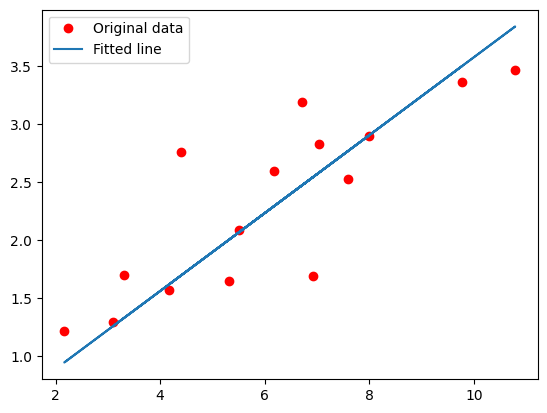

In [ ]:
predicted = model(torch.tensor(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# ワイン分類

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

In [ ]:
wine = load_wine()

In [ ]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
df['class'] = wine.target

In [ ]:
df.shape

(178, 14)

In [ ]:
df.drop(df[df['class']==2].index, inplace=True) # classが２のデータを削除
df.shape

(130, 14)

In [ ]:
wine_data = df.values[:,:13]
wine_target = df.values[:,13]

In [ ]:
train_x, test_x, train_t, test_t = train_test_split(wine_data, wine_target, test_size=0.25, random_state=0)

In [ ]:
train_x.shape, test_x.shape

((97, 13), (33, 13))

In [ ]:
train_x = torch.FloatTensor(train_x)
test_x = torch.FloatTensor(test_x)
train_t = torch.LongTensor(train_t)
test_t = torch.LongTensor(test_t)

In [ ]:
train_x.shape, test_x.shape, train_t.shape, test_t.shape

(torch.Size([97, 13]),
 torch.Size([33, 13]),
 torch.Size([97]),
 torch.Size([33]))

In [ ]:
train = TensorDataset(train_x, train_t)

In [ ]:
train_loader = DataLoader(train, batch_size=15, shuffle=True)

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(13, 128)
    self.fc2 = nn.Linear(128,2)
  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    # 最後のsoftmax関数はlossに内包されているから書かなくてよい
    return x

In [ ]:
model = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=model.parameters(), lr=0.01)

In [ ]:
for epoch in range(500):
  total_loss = 0
  for train_x, train_t in train_loader:
    optimizer.zero_grad()
    output = model(train_x)
    loss = criterion(output, train_t)
    loss.backward()
    optimizer.step()
    total_loss += loss.data
  if (epoch+1)%10 == 0:
    print(epoch+1, total_loss)

10 tensor(4.8604)
20 tensor(4.8173)
30 tensor(4.7940)
40 tensor(4.8110)
50 tensor(4.7637)
60 tensor(4.7726)
70 tensor(4.7713)
80 tensor(4.8091)
90 tensor(4.8306)
100 tensor(4.7888)
110 tensor(4.8092)
120 tensor(4.8086)
130 tensor(4.7900)
140 tensor(4.7888)
150 tensor(4.8303)
160 tensor(4.8095)
170 tensor(4.7901)
180 tensor(4.8113)
190 tensor(4.7886)
200 tensor(4.7888)
210 tensor(4.8107)
220 tensor(4.8318)
230 tensor(4.8312)
240 tensor(4.8103)
250 tensor(4.8306)
260 tensor(4.7886)
270 tensor(4.7889)
280 tensor(4.7893)
290 tensor(4.7687)
300 tensor(4.7692)
310 tensor(4.7892)
320 tensor(4.7306)
330 tensor(4.7891)
340 tensor(4.7885)
350 tensor(4.7892)
360 tensor(4.8088)
370 tensor(4.7495)
380 tensor(4.7886)
390 tensor(4.7892)
400 tensor(4.7698)
410 tensor(4.7505)
420 tensor(4.7500)
430 tensor(4.8105)
440 tensor(4.7476)
450 tensor(4.7683)
460 tensor(4.7686)
470 tensor(4.7888)
480 tensor(4.7893)
490 tensor(4.7690)
500 tensor(4.7691)


In [ ]:
test = model(test_x)
test

tensor([[-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429]], grad_fn=<AddmmBackward0>)

In [ ]:
test_model = model(test_x).detach()
test_model

tensor([[-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429],
        [-0.1226,  0.1429]])

In [ ]:
result = torch.max(test_model, 1)[1]
result

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy = sum(test_t.data.numpy() == result.numpy()) / len(test_t.data.numpy())
accuracy

0.48484848484848486

自分で実装(精度改善を目指して)

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [4]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [14]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['class'] = wine.target
df.drop(df[df['class']==2].index, inplace=True)
df.shape

(130, 14)

In [16]:
x = df.values[:,:13]
t = df.values[:,13]

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.179e+01, 2.130e+00, 2.780e+00, ..., 9.700e-01, 2.440e+00,
        4.660e+02],
       [1.237e+01, 1.630e+00, 2.300e+00, ..., 8.900e-01, 2.780e+00,
        3.420e+02],
       [1.204e+01, 4.300e+00, 2.380e+00, ..., 7.900e-01, 2.570e+00,
        5.800e+02]])

In [17]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.25, random_state=0)

In [18]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
t_train = torch.LongTensor(t_train)
t_test = torch.LongTensor(t_test)

In [19]:
train = TensorDataset(x_train, t_train)

In [30]:
train_loader = DataLoader(train, batch_size=15, shuffle=True)

In [23]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(13, 128)
    self.fc2 = nn.Linear(128, 128)
    self.fc3 = nn.Linear(128, 128)
    self.fc4 = nn.Linear(128, 128)
    self.fc5 = nn.Linear(128, 128)
    self.fc6 = nn.Linear(128, 2)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = self.fc6(x)
    return x

In [24]:
model = Net()

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=model.parameters(), lr=0.01)

In [36]:
for epoch in range(500):
  total_loss = 0
  for x_train, t_train in train_loader:
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, t_train)
    loss.backward()
    optimizer.step()
    total_loss += loss.data
  if (epoch + 1)%10 == 0:
    print(epoch+1, total_loss)

10 tensor(1.8210)
20 tensor(1.2637)
30 tensor(1.4647)
40 tensor(1.1203)
50 tensor(1.1593)
60 tensor(1.5428)
70 tensor(1.2377)
80 tensor(1.1580)
90 tensor(1.2407)
100 tensor(1.1222)
110 tensor(1.2098)
120 tensor(1.1916)
130 tensor(1.1999)
140 tensor(1.2525)
150 tensor(1.2846)
160 tensor(1.2548)
170 tensor(1.5054)
180 tensor(1.4811)
190 tensor(1.6648)
200 tensor(1.1184)
210 tensor(1.7411)
220 tensor(1.9309)
230 tensor(1.2989)
240 tensor(1.1516)
250 tensor(1.3534)
260 tensor(1.2353)
270 tensor(1.3177)
280 tensor(1.0477)
290 tensor(1.1983)
300 tensor(1.0964)
310 tensor(1.4263)
320 tensor(1.8178)
330 tensor(1.0905)
340 tensor(1.4271)
350 tensor(1.5716)
360 tensor(1.7077)
370 tensor(1.4374)
380 tensor(1.2341)
390 tensor(1.4774)
400 tensor(1.2944)
410 tensor(1.5402)
420 tensor(1.0987)
430 tensor(1.3267)
440 tensor(1.2522)
450 tensor(1.0832)
460 tensor(1.3538)
470 tensor(1.1421)
480 tensor(1.2988)
490 tensor(1.1977)
500 tensor(1.2404)


In [45]:
test = model(x_test).detach()
result = torch.max(test,1)[1]
result

tensor([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0])

In [46]:
t_test

tensor([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 1, 0])